In [1]:
%matplotlib inline
from scapy.all import *
import matplotlib.pyplot as plt

In [68]:
pcaps = []
for i in range(1,11):
    pcaps.append(rdpcap("team-24-captures/%d.pcap" % i))
                 
reference = rdpcap("reference.pcap")

In [69]:
# Filter only TCP traffic
for i in range(len(pcaps)):
    pcaps[i] = pcaps[i].filter(lambda x : 'TCP' in x)
    
reference = reference.filter(lambda x : 'TCP' in x)

# Only traffic directted to the server
for i in range(len(pcaps)):
    pcaps[i] = pcaps[i].filter(lambda x : x['TCP'].dport == 5000)
    
reference = reference.filter(lambda x : x['TCP'].dport == 5000)

#wrpcap('filtered.pcap', pcaps[0])

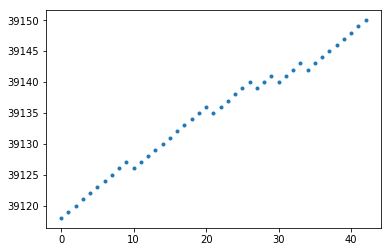

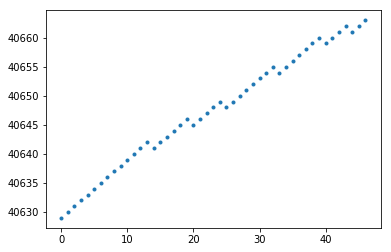

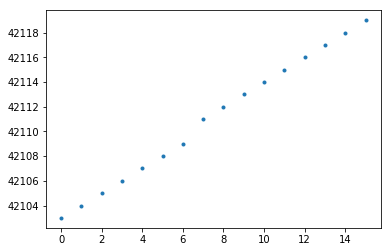

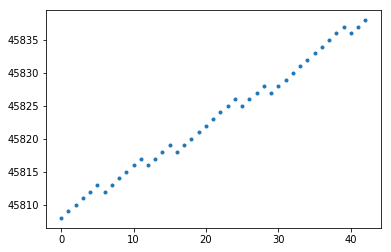

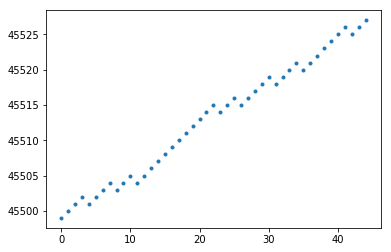

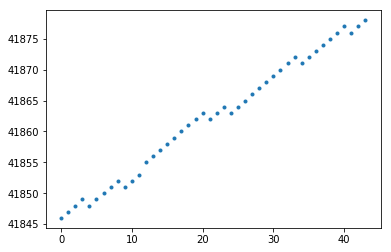

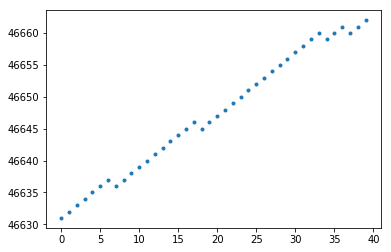

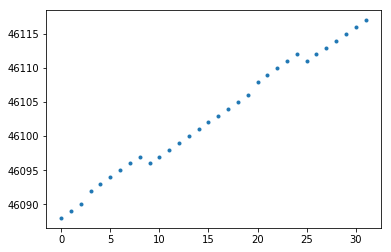

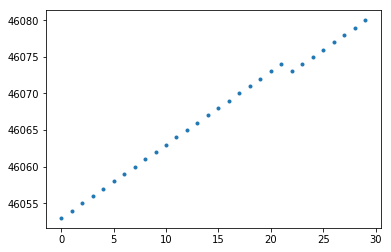

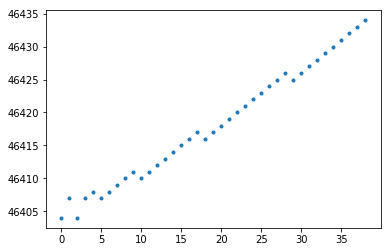

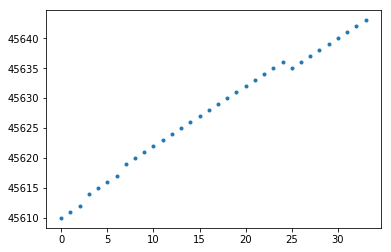

In [60]:
# Let's analyse the ports
def get_ports(pcap):
    ports = []
    for p in pcap:
        port = p['TCP'].sport
        if (len(ports) == 0 or ports[-1] != port) and port != 5000:
            #print port
            ports.append(p['TCP'].sport)
    #print "#################"
    return ports
        
    
plt.plot(get_ports(reference),'.')
plt.show()
ports = []
for pcap in pcaps: ports.append(get_ports(pcap))
for p in ports:
    plt.plot(p,'.')
    plt.show()

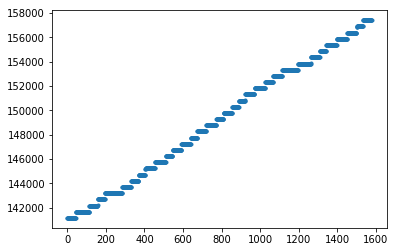

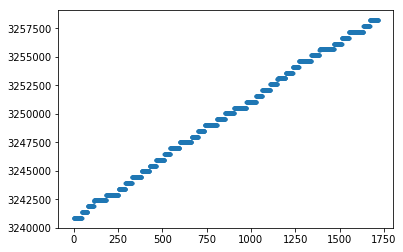

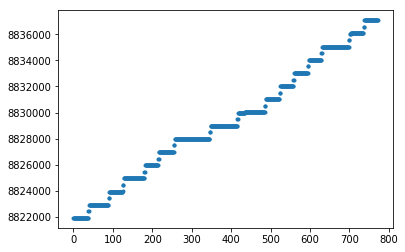

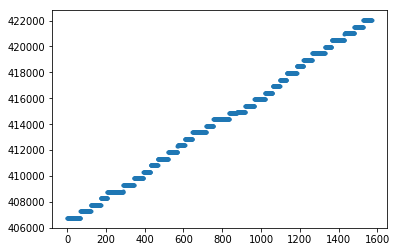

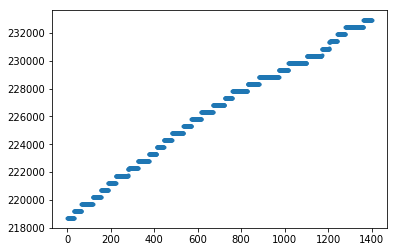

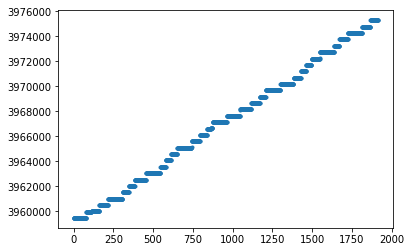

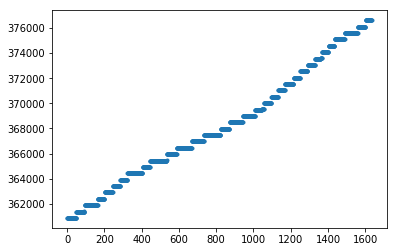

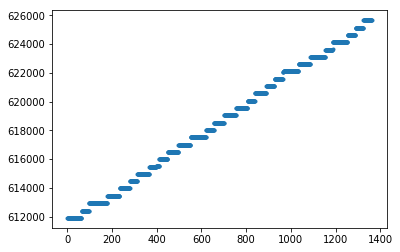

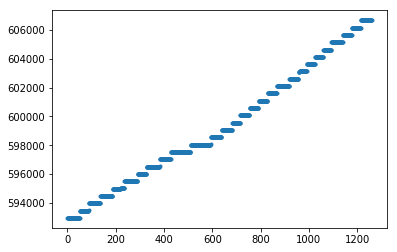

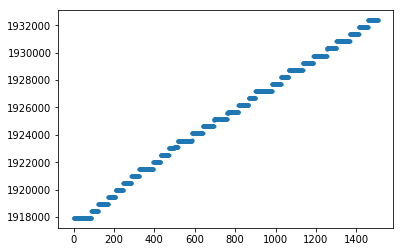

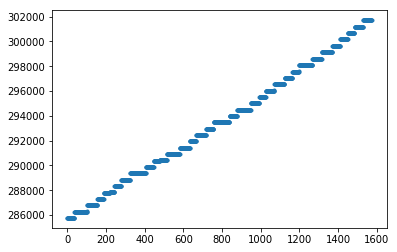

In [76]:
# Let's analyse the time
def get_times(pcap):
    times = []
    for p in pcap:
        times.append(p['TCP'].time)
    return times
        
plt.plot(get_times(reference),'.')
plt.show()
tmp = []
for pcap in pcaps: tmp.append(get_times(pcap))
for p in tmp:
    plt.plot(p,'.')
    plt.show()

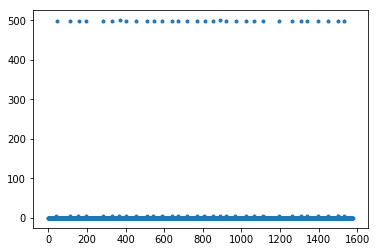

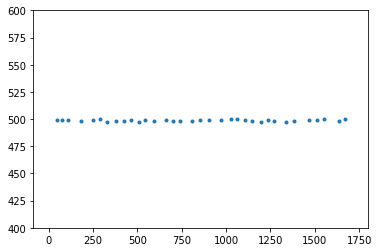

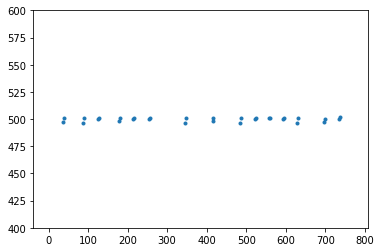

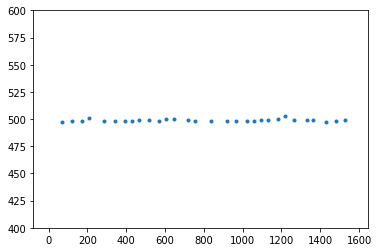

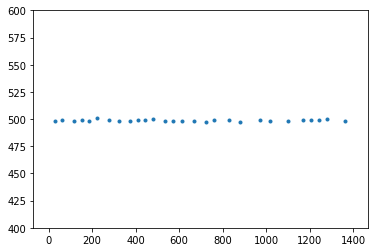

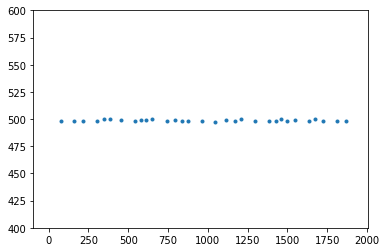

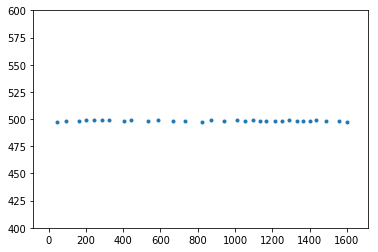

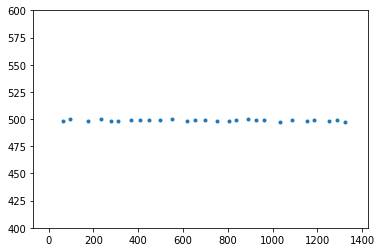

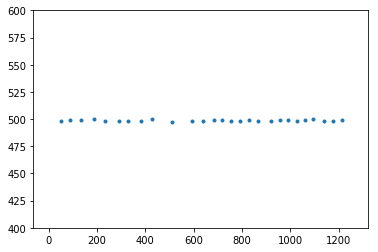

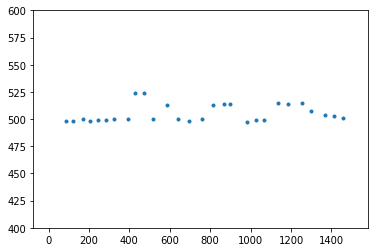

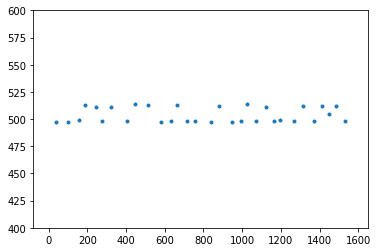

In [114]:
# Let's analyse the time diffs
def get_tdiff(pcap):
    times = get_times(pcap)
    tdiffs = [times[i]-times[i-1] for i in range(len(times)-1)]
    return tdiffs[1:]
    
        
    
plt.plot(get_tdiff(reference),'.')
plt.show()
tmp = []
for pcap in pcaps: tmp.append(get_tdiff(pcap))
for p in tmp:
    plt.plot(p,'.')
    plt.ylim(400,600)
    plt.show()

In [155]:
# Let's diff the payloads
def get_payloads(pcap):
    payloads = []
    for s in pcap.sessions().items():
        session_payload = ""
        for p in s[1]:
            p = IP(str(p[IP])[0:p['IP'].len])             # Remove Ethernet trailer
            if 'P' not in str(p['TCP'].flags): continue
            session_payload += str(p['TCP'].payload)
        payloads.append(session_payload)
    return payloads

def compare_entries(payloads):
    for i in range(len(payloads)):
        for j in range(len(payloads)):
            if payloads[i] != payloads[j]:
                print i,j

for p in pcaps:
    print "#########################"
    payloads = get_payloads(p)
    compare_entries(payloads)

#########################
0 26
1 26
2 26
3 26
4 26
5 26
6 26
7 26
8 26
9 26
10 26
11 26
12 26
13 26
14 26
15 26
16 26
17 26
18 26
19 26
20 26
21 26
22 26
23 26
24 26
25 26
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
26 15
26 16
26 17
26 18
26 19
26 20
26 21
26 22
26 23
26 24
26 25
26 27
26 28
26 29
26 30
26 31
26 32
26 33
26 34
27 26
28 26
29 26
30 26
31 26
32 26
33 26
34 26
#########################
0 15
1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
#########################
0 5
1 5
2 5
3 5
4 5
5 0
5 1
5 2
5 3
5 4
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
6 5
7 5
8 5
9 5
10 5
11 5
12 5
13 5
14 5
15 5
16 5
17 5
18 5
19 5
20 5
21 5
22 5
23 5
24 5
25 5
26 5
27 5
28 5
29 5
30 5
#########################
0 13
1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13
10 13
11 13
12 1

####### Reference ########


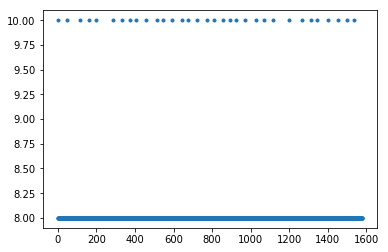

####### Others ########


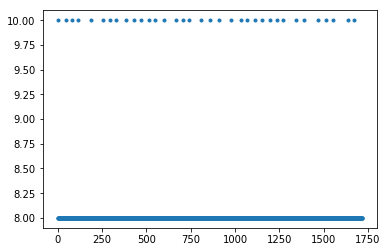

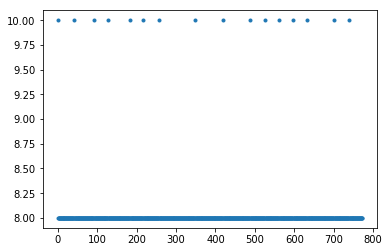

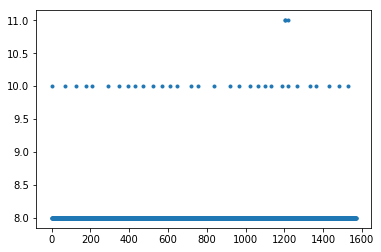

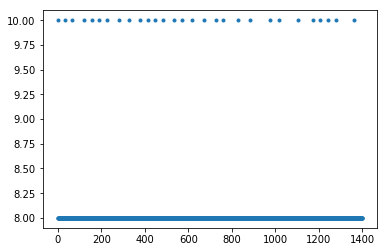

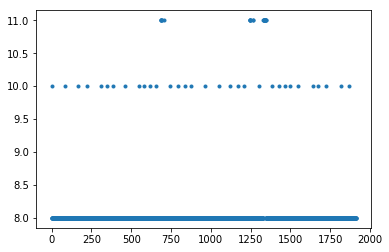

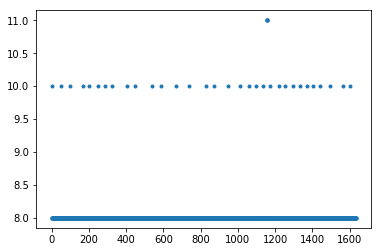

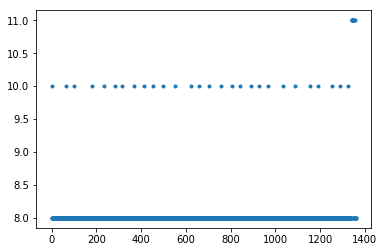

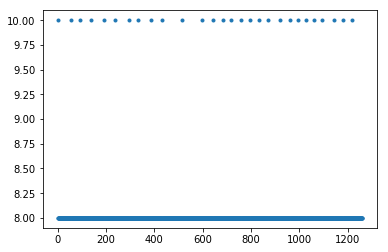

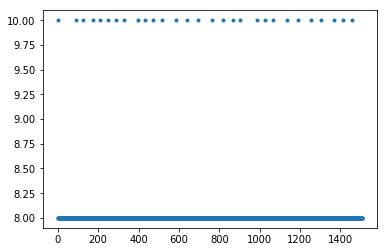

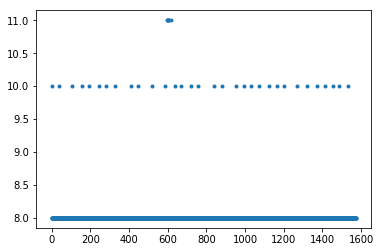

In [125]:
def get_field(pcap,field):
    tmp = []
    for p in pcap:
        tmp.append(eval("p"+field))
    return tmp

# Use p to reference the packet in the eval string
def get_eval(pcap,e):
    tmp = []
    for p in pcap:
        tmp.append(eval(e)) 
    return tmp

def plot_field(field,evalstr=None):
    print "####### Reference ########"
    plt.plot(get_field(reference,field),'.')
    if evalstr: eval(evalstr)
    plt.show()
    
    print "####### Others ########"
    tmp = []
    for pcap in pcaps: tmp.append(get_field(pcap,field))
    for p in tmp:
        plt.plot(p,'.')
        if evalstr: eval(evalstr)
        plt.show()
        
def plot_eval(e,evalstr=None):
    print "####### Reference ########"
    plt.plot(get_eval(reference,e),'.')
    if evalstr: eval(evalstr)
    plt.show()
    
    print "####### Others ########"
    tmp = []
    for pcap in pcaps: tmp.append(get_eval(pcap,e))
    for p in tmp:
        plt.plot(p,'.')
        if evalstr: eval(evalstr)
        plt.show()
    
plot_field(".dataofs")

####### Reference ########


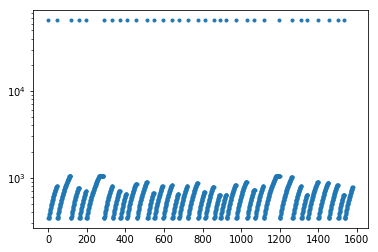

####### Others ########


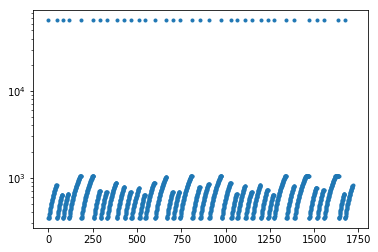

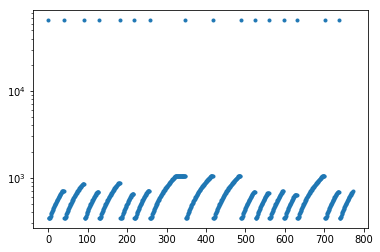

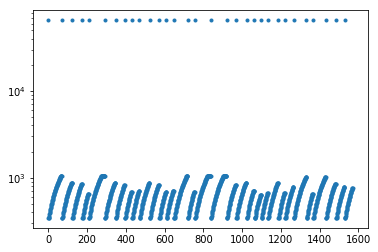

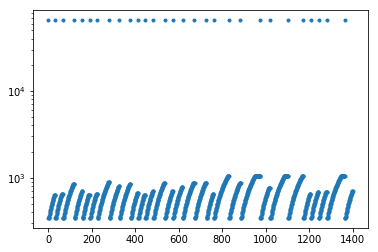

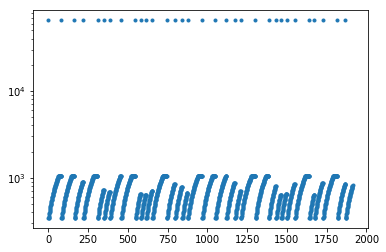

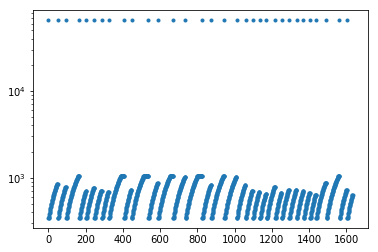

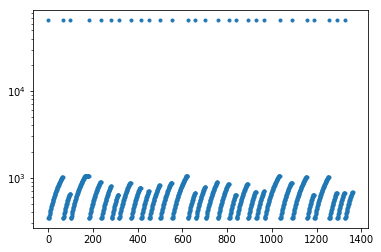

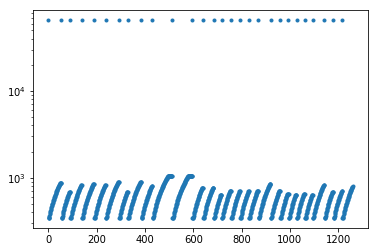

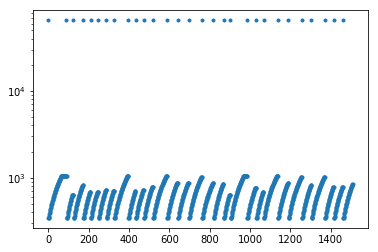

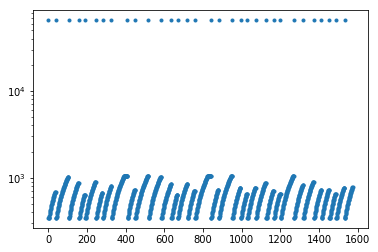

In [116]:
plot_field("['TCP'].window","plt.yscale('log')")

####### Reference ########


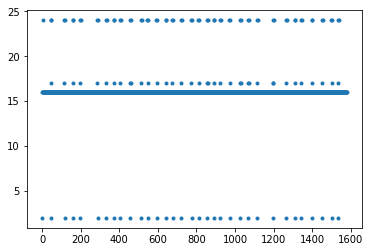

####### Others ########


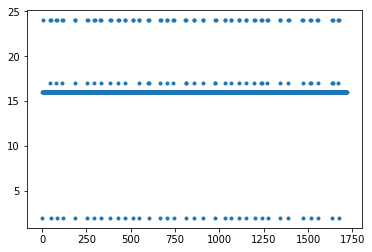

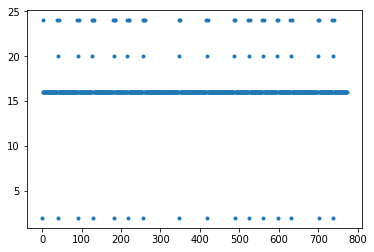

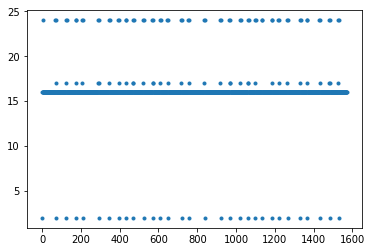

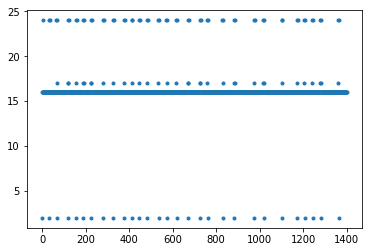

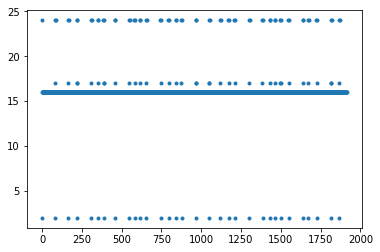

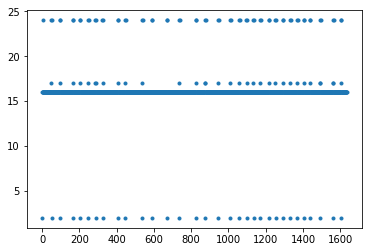

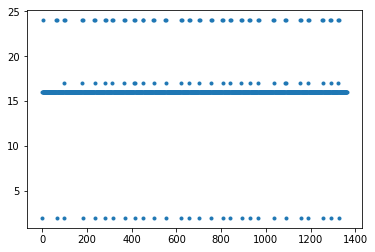

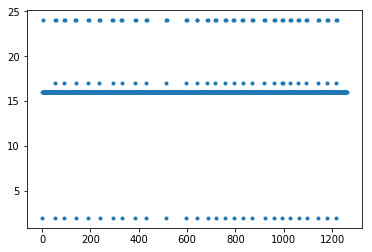

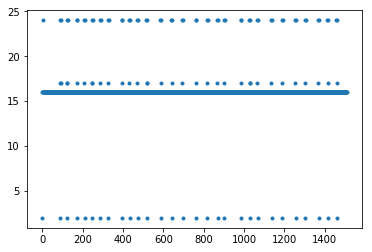

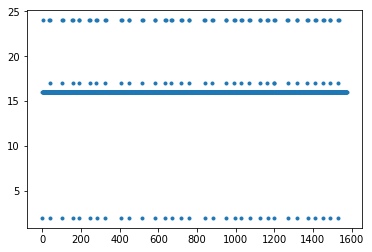

In [117]:
plot_field("['TCP'].flags.value")

####### Reference ########


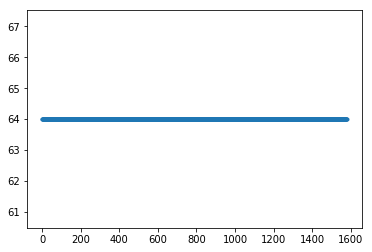

####### Others ########


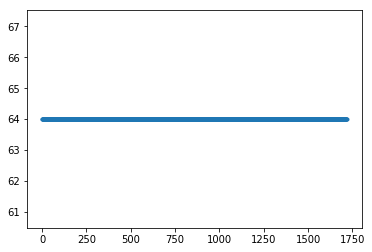

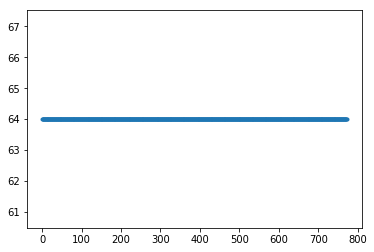

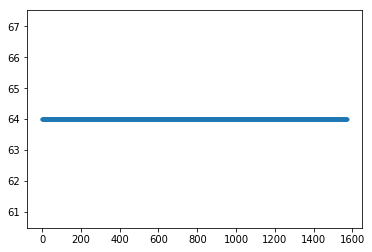

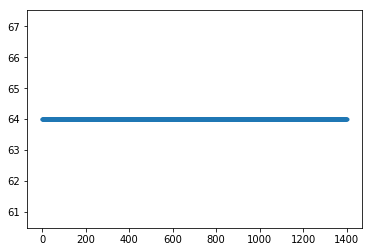

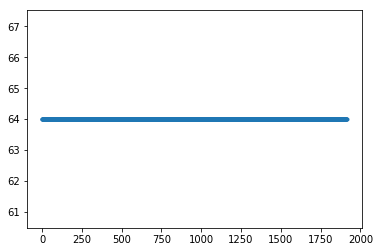

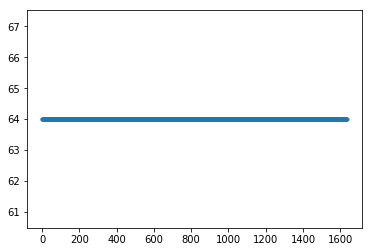

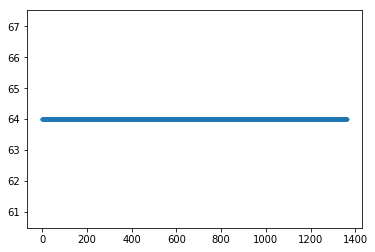

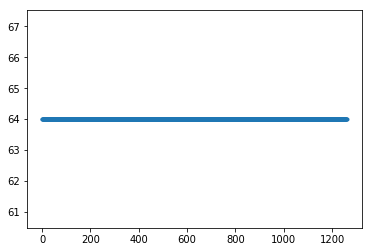

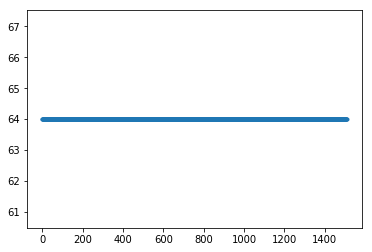

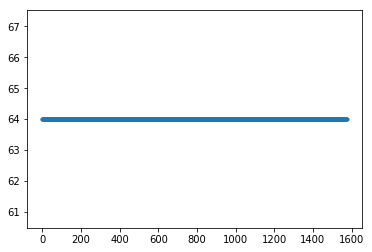

In [120]:
plot_field("[IP].ttl")

In [154]:
##### Print fields changes (this code is so orrible I can hear my python interpeter crying) ########
def print_changes(fields):
    last = None
    cnt = 1
    for v in zip(*[get_eval(reference,f) for f in fields]):
        if v == last:
            cnt += 1
            continue
        last = v
        print cnt
        print v,
        cnt = 1
    
    for pcap in pcaps:
        last = None
        cnt = 1
        print "########################"
        for v in zip(*[get_eval(pcap,f) for f in fields]):
            if v == last:
                cnt += 1
                continue
            last = v
            print cnt
            print v,
            cnt = 1
    
#print_changes(["p[TCP].options if len(p[TCP].options) > 5 else 0"])
print_changes(['str(p[Padding]).encode("hex")'])

1
('5fc4',) 1
('7e9a',) 1
('e73f',) 1
('bc5c',) 1
('f1a0',) 1
('1c9a',) 1
('3379',) 1
('d946',) 1
('c9c5',) 1
('9212',) 1
('5c79',) 1
('7223',) 1
('421a',) 1
('5a67',) 1
('1db9',) 1
('f350',) 1
('d361',) 1
('b476',) 1
('98a6',) 1
('bd75',) 1
('2b36',) 1
('db54',) 1
('d15d',) 1
('ae09',) 1
('9bd7',) 1
('bd65',) 1
('c04f',) 1
('8878',) 1
('fccd',) 1
('a7ae',) 1
('ea4f',) 1
('11ae',) 1
('bb75',) 1
('a389',) 1
('d9bc',) 1
('998e',) 1
('5d9d',) 1
('7304',) 1
('e0a2',) 1
('94fe',) 1
('cd10',) 1
('bbbe',) 1
('e3d7',) 1
('de5c',) 1
('1a6b',) 1
('f9a4',) 1
('2f86',) 1
('99c7',) 1
('da25',) 1
('0462',) 1
('3ca8',) 1
('bf7f',) 1
('9097',) 1
('a031',) 1
('6a85',) 1
('ee92',) 1
('1c0b',) 1
('fbc4',) 1
('c4ea',) 1
('1e63',) 1
('886f',) 1
('5911',) 1
('d608',) 1
('70e4',) 1
('012a',) 1
('e14a',) 1
('2c56',) 1
('7083',) 1
('2517',) 1
('b6b1',) 1
('cb90',) 1
('cb87',) 1
('90f8',) 1
('538d',) 1
('7abf',) 1
('e1e1',) 1
('0746',) 1
('2f04',) 1
('c92e',) 1
('937e',) 1
('131e',) 1
('087d',) 1
('6038',) 1
('

('b6c0',) 1
('8453',) 1
('97c5',) 1
('f1df',) 1
('7e31',) 1
('760e',) 1
('44af',) 1
('3fa8',) 1
('2ad8',) 1
('8ed8',) 1
('1677',) 1
('5cef',) 1
('4088',) 1
('6d7a',) 1
('9475',) 1
('eb7d',) 1
('edec',) 1
('3b7a',) 1
('ef14',) 1
('8ecf',) 1
('2d94',) 1
('37c2',) 1
('6d3f',) 1
('6bc5',) 1
('d2ef',) 1
('3af0',) 1
('935c',) 1
('41ba',) 1
('c11a',) 1
('16ff',) 1
('e0f8',) 1
('7707',) 1
('3f53',) 1
('d593',) 1
('5ea2',) 1
('2917',) 1
('26e2',) 1
('e6e7',) 1
('4238',) 1
('806d',) 1
('7bd4',) 1
('db98',) 1
('6947',) 1
('eee1',) 1
('039e',) 1
('32d9',) 1
('9075',) 1
('f2ba',) 1
('2699',) 1
('0dd9',) 1
('52be',) 1
('bb8b',) 1
('b2bd',) 1
('757d',) 1
('c4af',) 1
('066e',) 1
('df30',) 1
('a245',) 1
('31ab',) 1
('a556',) 1
('4cea',) 1
('d83b',) 1
('9746',) 1
('ab4f',) 1
('350f',) 1
('51dd',) 1
('cfca',) 1
('4121',) 1
('d28c',) 1
('32b5',) 1
('04a5',) 1
('f27a',) 1
('7a33',) 1
('eb55',) 1
('51fc',) 1
('4d76',) 1
('d63b',) 1
('8610',) 1
('b10a',) 1
('8489',) 1
('eda6',) 1
('1759',) 1
('29b8',) 1
('a4

('3a74',) 1
('c9fd',) 1
('9855',) 1
('3370',) 1
('76af',) 1
('888c',) 1
('2f59',) 1
('2019',) 1
('f0ce',) 1
('496c',) 1
('698b',) 1
('4562',) 1
('b0ee',) 1
('8e8a',) 1
('e05a',) 1
('7539',) 1
('6bf4',) 1
('6f27',) 1
('b8ac',) 1
('e47c',) 1
('d4c3',) 1
('8df0',) 1
('3670',) 1
('9f82',) 1
('72d0',) 1
('f8f2',) 1
('54f5',) 1
('4a74',) 1
('841b',) 1
('e543',) 1
('a293',) 1
('542d',) 1
('3b7a',) 1
('0325',) 1
('953e',) 1
('5c04',) 1
('1485',) 1
('37b6',) 1
('3a86',) 1
('a044',) 1
('b31e',) 1
('0c39',) 1
('36d3',) 1
('322a',) 1
('b0ac',) 1
('ebad',) 1
('baf4',) 1
('5c1d',) 1
('dea1',) 1
('f18b',) ########################
1
('69ed',) 1
('69e8',) 1
('8f40',) 1
('38b6',) 1
('82a1',) 1
('5268',) 1
('f299',) 1
('da42',) 1
('aa47',) 1
('0caf',) 1
('ffeb',) 1
('f746',) 1
('36a8',) 1
('71c3',) 1
('5a1c',) 1
('853f',) 1
('8ec2',) 1
('78f5',) 1
('5053',) 1
('ca8c',) 1
('99ec',) 1
('8194',) 1
('b0d1',) 1
('a924',) 1
('9e1d',) 1
('862c',) 1
('82f1',) 1
('27dd',) 1
('5fe5',) 1
('c986',) 1
('4629',) 1
('3

('7638',) 1
('ec25',) 1
('46d8',) 1
('6ee8',) 1
('575d',) 1
('40b8',) 1
('2a3f',) 1
('e69d',) 1
('0324',) 1
('1bae',) 1
('7300',) 1
('e488',) 1
('2356',) 1
('8810',) 1
('616c',) 1
('df87',) 1
('f739',) 1
('b904',) 1
('51ea',) 1
('a9de',) 1
('0340',) 1
('dad4',) 1
('fe20',) 1
('5620',) 1
('f8d6',) 1
('53ae',) 1
('c3a5',) 1
('f32f',) 1
('2d51',) 1
('915a',) 1
('146e',) 1
('977b',) 1
('fb3e',) 1
('1722',) 1
('6abe',) 1
('9737',) 1
('3df4',) 1
('9710',) 1
('6681',) 1
('5e44',) 1
('95bf',) 1
('6ea0',) 1
('f74f',) 1
('8435',) 1
('2ca9',) 1
('7a95',) 1
('d746',) 1
('fd29',) 1
('4d61',) 1
('b314',) 1
('0043',) 1
('3cb9',) 1
('3498',) 1
('8cd8',) 1
('8a07',) 1
('efaa',) 1
('ec50',) 1
('b409',) 1
('d718',) 1
('a4cb',) 1
('d97b',) 1
('f930',) 1
('ea75',) 1
('98e1',) 1
('4344',) 1
('3cd8',) 1
('b7a3',) 1
('8d1c',) 1
('cdd0',) 1
('61f9',) 1
('7269',) 1
('b04e',) 1
('7927',) 1
('3e4e',) 1
('76e3',) 1
('9d56',) 1
('17b1',) 1
('ab8a',) 1
('020e',) 1
('1eff',) 1
('8df9',) 1
('3979',) 1
('d596',) 1
('94

('0d6a',) 1
('686d',) 1
('ce47',) 1
('bd10',) 1
('9764',) 1
('287b',) 1
('5744',) 1
('e067',) 1
('14c5',) 1
('2ce7',) 1
('c83a',) 1
('2d94',) 1
('7a31',) 1
('fc35',) 1
('19a5',) 1
('596f',) 1
('5f70',) 1
('9359',) 1
('c5bc',) 1
('1ed6',) 1
('cd9b',) 1
('6a26',) 1
('5965',) 1
('b05a',) 1
('cb6d',) 1
('a5c1',) 1
('db55',) 1
('3e41',) 1
('2400',) 1
('c9c9',) 1
('d3b7',) 1
('b96c',) 1
('cd2a',) 1
('ebaf',) 1
('7afd',) 1
('6663',) 1
('d920',) 1
('a942',) 1
('b4c7',) 1
('dfb3',) 1
('5057',) 1
('78a3',) 1
('91c6',) 1
('f8ad',) 1
('8dc4',) 1
('eb11',) 1
('dead',) 1
('f63d',) 1
('448a',) 1
('81ba',) 1
('ff7a',) 1
('a42d',) 1
('39dd',) 1
('1987',) 1
('5f8d',) 1
('3583',) 1
('fa52',) 1
('09ef',) 1
('194f',) 1
('3864',) 1
('cf95',) 1
('9eab',) 1
('d152',) 1
('b4e5',) 1
('48db',) 1
('d224',) 1
('8439',) 1
('0031',) 1
('254d',) 1
('5bb7',) 1
('3f65',) 1
('ec90',) 1
('84c8',) 1
('b109',) 1
('83d2',) 1
('9bba',) 1
('b473',) 1
('f1ac',) 1
('1e51',) 1
('a0b8',) 1
('e8c5',) 1
('ab3a',) 1
('28fd',) 1
('e0

('47de',) 1
('e911',) 1
('4041',) 1
('8134',) 1
('3773',) 1
('12d1',) 1
('ac87',) 1
('5d7d',) 1
('9f37',) 1
('ccec',) 1
('b58c',) 1
('8e9e',) 1
('44fd',) 1
('d647',) 1
('5f5e',) 1
('a36f',) 1
('0ef4',) 1
('c4e8',) 1
('e9d2',) 1
('e9cf',) 1
('a009',) 1
('00d5',) 1
('6ba0',) 1
('ea9d',) 1
('c1fb',) 1
('ca18',) 1
('c5d2',) 1
('fe23',) 1
('3fb5',) 1
('3039',) 1
('003d',) 1
('fcfe',) 1
('baa7',) 1
('8430',) 1
('4461',) 1
('8b68',) 1
('fb01',) 1
('e333',) 1
('ff5f',) 1
('534d',) 1
('4ef5',) 1
('5112',) 1
('9b13',) 1
('a605',) 1
('5cce',) 1
('4c18',) 1
('3e0c',) 1
('b68d',) 1
('a3e7',) 1
('73b0',) 1
('0430',) 1
('b36c',) 1
('2e09',) 1
('ff6a',) 1
('be2c',) 1
('5b49',) 1
('c767',) 1
('c61c',) 1
('2285',) 1
('aebb',) 1
('dab5',) 1
('bf16',) 1
('3a12',) 1
('6773',) 1
('c78a',) 1
('c45f',) 1
('94da',) 1
('b3e1',) 1
('95ac',) 1
('c907',) 1
('4121',) 1
('87ea',) 1
('bd73',) 1
('70c9',) 1
('bc7f',) 1
('13b9',) 1
('8bc6',) 1
('c2ac',) 1
('3637',) 1
('0c68',) 1
('0ac1',) 1
('9697',) 1
('0b3f',) 1
('99

('39bb',) 1
('a46e',) 1
('a045',) 1
('95f4',) 1
('15c1',) 1
('8b6d',) 1
('d8f5',) 1
('bf2e',) 1
('228e',) 1
('e80d',) 1
('b70a',) 1
('3d89',) 1
('05fe',) 1
('c236',) 1
('d1a4',) 1
('b69d',) 1
('37f9',) 1
('497e',) 1
('054c',) 1
('a190',) 1
('fd18',) 1
('1433',) 1
('e0ac',) 1
('627d',) 1
('bb83',) 1
('e90f',) 1
('9a7a',) 1
('8062',) 1
('2334',) 1
('dc58',) 1
('0520',) 1
('3061',) 1
('41d2',) 1
('7411',) 1
('891a',) 1
('6c78',) 1
('0044',) 1
('f27a',) 1
('883b',) 1
('4c0f',) 1
('7b6f',) 1
('ade3',) 1
('5360',) 1
('8502',) 1
('3074',) 1
('51e7',) 1
('1dff',) 1
('5c1d',) 1
('bcd5',) 1
('785b',) 1
('c103',) 1
('1456',) 1
('0c97',) 1
('ded9',) 1
('65cd',) 1
('62d0',) 1
('8960',) 1
('4282',) 1
('790a',) 1
('32b6',) 1
('7bbb',) 1
('6996',) 1
('ecb5',) 1
('196c',) 1
('a45b',) 1
('b9c9',) 1
('68f2',) 1
('f895',) 1
('fe02',) 1
('fa28',) 1
('b343',) 1
('a2d7',) 1
('9505',) 1
('68c8',) 1
('e591',) 1
('52b5',) 1
('c252',) 1
('56c7',) 1
('4803',) 1
('1cdd',) 1
('3162',) 1
('05f0',) 1
('8b2f',) 1
('68

('0391',) 1
('0a1b',) 1
('ac36',) 1
('ba36',) 1
('d7af',) 1
('4819',) 1
('902a',) 1
('3f9d',) 1
('72b5',) 1
('0c8f',) 1
('6e1d',) 1
('bfbb',) 1
('9f36',) 1
('dcd0',) 1
('1b55',) 1
('1591',) 1
('1f0b',) 1
('a077',) 1
('ee26',) 1
('2119',) 1
('545f',) ########################
1
('b34d',) 1
('a104',) 1
('3008',) 1
('23de',) 1
('9c31',) 1
('bd3d',) 1
('1285',) 1
('6feb',) 1
('a1a2',) 1
('0082',) 1
('c0b0',) 1
('cd50',) 1
('06aa',) 1
('aa4c',) 1
('f9d5',) 1
('db91',) 1
('2cf0',) 1
('dcb9',) 1
('77f3',) 1
('fb60',) 1
('849c',) 1
('00fc',) 1
('611f',) 1
('8cbf',) 1
('af33',) 1
('e7fa',) 1
('1bf1',) 1
('2c50',) 1
('8526',) 1
('5e2a',) 1
('cc30',) 1
('683a',) 1
('a198',) 1
('6976',) 1
('5a43',) 1
('a6a1',) 1
('4e7a',) 1
('36fb',) 1
('3c9e',) 1
('459a',) 1
('061e',) 1
('c371',) 1
('f869',) 1
('08ec',) 1
('b8d3',) 1
('ad04',) 1
('9527',) 1
('e085',) 1
('7d18',) 1
('0bb8',) 1
('b5a6',) 1
('83b7',) 1
('bbbd',) 1
('4bdc',) 1
('221a',) 1
('49ba',) 1
('0dd6',) 1
('2ae5',) 1
('cd39',) 1
('df5c',) 1
('0

('fe9a',) 1
('f621',) 1
('939d',) 1
('1dfb',) 1
('9c3b',) 1
('efbd',) 1
('4518',) 1
('4bd2',) 1
('034f',) 1
('9cf2',) 1
('9e72',) 1
('4947',) 1
('5eb2',) 1
('e9f4',) 1
('6526',) 1
('8198',) 1
('ccd4',) 1
('0a2d',) 1
('1f0c',) 1
('59c5',) 1
('fd66',) 1
('81b6',) 1
('15d4',) 1
('3008',) 1
('c243',) 1
('deb3',) 1
('23fe',) 1
('3008',) 1
('652a',) 1
('ecdf',) 1
('6e2c',) 1
('c19a',) 1
('aae0',) 1
('c1f3',) 1
('bcde',) 1
('ad03',) 1
('f84c',) 1
('c2c9',) 1
('78fc',) 1
('9b72',) 1
('6324',) 1
('d736',) 1
('0dc1',) 1
('779d',) 1
('13f4',) 1
('3ed2',) 1
('9e6c',) 1
('411e',) 1
('695b',) 1
('2eff',) 1
('7fe4',) 1
('213f',) 1
('1dda',) 1
('c0e9',) 1
('c864',) 1
('eeba',) 1
('65be',) 1
('433a',) 1
('9217',) 1
('2422',) 1
('eeee',) 2
('3008',) 1
('eeee',) 1
('3008',) 1
('2610',) 1
('8570',) 1
('6f3f',) 1
('2960',) 1
('ffe7',) 1
('bb61',) 1
('a441',) 1
('31d2',) 1
('b8f2',) 1
('1b6f',) 1
('f799',) 1
('a269',) 1
('1279',) 1
('ab43',) 1
('3008',) 1
('eeee',) 1
('52b7',) 1
('3ea0',) 1
('6797',) 1
('6e

('3a09',) 1
('9fb6',) 1
('654c',) 1
('76e7',) 1
('6de5',) 1
('0f55',) 1
('5b44',) 1
('a5f4',) 1
('840a',) 1
('77a6',) 1
('3105',) 1
('abad',) 1
('e170',) 1
('1245',) 1
('06b2',) 1
('5150',) 1
('7f31',) 1
('e69a',) 1
('1412',) 1
('5366',) 1
('cf02',) 1
('f466',) 1
('5406',) 1
('1d28',) 1
('3f1c',) 1
('0ff2',) 1
('1fe0',) 1
('6101',) 1
('4603',) 1
('314e',) 1
('9de2',) 1
('7f3c',) 1
('0fcb',) 1
('3cf4',) 1
('c060',) 1
('e1a2',) 1
('9233',) 1
('21b9',) 1
('56c8',) 1
('cf13',) 1
('85d3',) 1
('aaca',) 1
('4065',) 1
('0dd5',) 1
('1ef3',) 1
('5793',) 1
('f577',) 1
('a912',) 1
('0d38',) 1
('3feb',) 1
('79a9',) 1
('f7bc',) 1
('2659',) 1
('3416',) 1
('e2c5',) 1
('4353',) 1
('dfb3',) 1
('c5d7',) 1
('f309',) 1
('91dc',) 1
('ed93',) 1
('df29',) 1
('5dda',) 1
('f851',) 1
('90b1',) 1
('a802',) 1
('ae69',) 1
('11c5',) 1
('37ec',) 1
('f0df',) 1
('b4d5',) 1
('0f40',) 1
('4782',) 1
('efd9',) 1
('157d',) 1
('cb5a',) 1
('5deb',) 1
('2c53',) 1
('847f',) 1
('163b',) 1
('ce26',) 1
('11fc',) 1
('f8da',) 1
('8c

('0a32',) 1
('ffd6',) 1
('2a17',) 1
('415d',) 1
('57eb',) 1
('bfc1',) 1
('9bc8',) 1
('7423',) 1
('e4ef',) 1
('e5bb',) 1
('dac6',) 1
('5d55',) 1
('9a0f',) 1
('b25c',) 1
('a673',) 1
('9419',) 1
('9820',) 1
('9f8b',) 1
('4b1b',) 1
('9442',) 1
('7730',) 1
('6bfc',) 1
('ed70',) 1
('6f05',) 1
('0007',) 1
('e381',) 1
('6fd8',) 1
('6738',) 1
('0b91',) 1
('7b80',) 1
('63fe',) 1
('2534',) 1
('5b9f',) 1
('4aec',) 1
('d19a',) 1
('fde4',) 1
('0088',) 1
('7fde',) 1
('e832',) 1
('c660',) 1
('bfa2',) 1
('89fe',) 1
('0d24',) 1
('f24b',) 1
('b8df',) 1
('cedb',) 1
('2f25',) 1
('c3d7',) 1
('2b89',) 1
('8ca9',) 1
('7510',) 1
('dd04',) 1
('68e8',) 1
('fb3b',) 1
('372a',) 1
('31ff',) 1
('cad0',) 1
('de6f',) 1
('eae6',) 1
('f58e',) 1
('83bf',) 1
('9ec4',) 1
('53d5',) 1
('024b',) 1
('0359',) 1
('aad5',) 1
('3ac1',) 1
('378e',) 1
('3688',) 1
('f9d9',) 1
('6eed',) 1
('8592',) 1
('37ed',) 1
('f7c5',) 1
('6f81',) 1
('d6ba',) 1
('e25b',) 1
('72d3',) 1
('c446',) 1
('8d01',) 1
('1e8a',) 1
('4419',) 1
('d2f2',) 1
('c0

('9a31',) 1
('aa56',) 1
('4d08',) 1
('e465',) 1
('0a0e',) 1
('03fe',) 1
('8f05',) 1
('0a65',) 1
('502e',) 1
('b947',) 1
('e37d',) 1
('a966',) 1
('266d',) 1
('52fe',) 1
('be4a',) 1
('028a',) 1
('901c',) 1
('e9a6',) 1
('701a',) 1
('2f11',) 1
('aa6a',) 1
('9c16',) 1
('924d',) 1
('e627',) 1
('f01a',) 1
('3a17',) 1
('2a2f',) 1
('2c0f',) 1
('ba83',) 1
('029f',) 1
('8622',) 1
('eeb1',) 1
('81d8',) 1
('e10b',) 1
('b0ce',) 1
('e3c6',) 1
('6f02',) 1
('cf85',) 1
('edbf',) 1
('e044',) 1
('a34d',) 1
('110c',) 1
('5cde',) 1
('ff3e',) 1
('a923',) 1
('6c9e',) 1
('a4e7',) 1
('1210',) 1
('98d3',) 1
('b103',) 1
('41fa',) 1
('d858',) 1
('6efc',) 1
('968a',) 1
('9fe3',) 1
('86a3',) 1
('b85d',) 1
('6707',) 1
('eb22',) 1
('6518',) 1
('65bc',) 1
('ece9',) 1
('adc6',) 1
('247b',) 1
('03ce',) 1
('114b',) 1
('94fc',) 1
('f5bf',) 1
('8a77',) 1
('5858',) 1
('7924',) 1
('ce92',) 1
('92bf',) 1
('112d',) 1
('74a9',) 1
('60f6',) 1
('e12a',) 1
('3d1c',) 1
('b565',) 1
('7916',) 1
('465b',) 1
('dc6f',) 1
('ca1c',) 1
('5b

('f0fb',) 1
('b271',) 1
('2854',) 1
('7301',) 1
('3003',) 1
('4798',) 1
('31c6',) 1
('966d',) 1
('460f',) 1
('a2ef',) 1
('5f69',) 1
('86a3',) 1
('4dec',) 1
('4e6b',) 1
('2779',) 1
('e20c',) 1
('29fe',) 1
('0661',) 1
('0ea5',) 1
('10df',) 1
('0591',) 1
('a465',) 1
('8260',) 1
('22f2',) 1
('7264',) 1
('9456',) 1
('5d56',) 1
('b296',) 1
('45c5',) 1
('a5a7',) 1
('7968',) 1
('e46e',) 1
('116e',) 1
('c7a1',) 1
('4d20',) 1
('7f1d',) 1
('ad26',) 1
('c2c4',) 1
('8ad9',) 1
('48ea',) 1
('f7fd',) 1
('6830',) 1
('84d6',) 1
('b182',) 1
('6e08',) 1
('edb3',) 1
('5347',) 1
('a0ad',) 1
('7685',) 1
('06fd',) 1
('dd74',) 1
('ad0c',) 1
('bbde',) 1
('f43b',) 1
('45fc',) 1
('8782',) 1
('eb75',) 1
('96ac',) 1
('6f58',) 1
('d651',) 1
('bcba',) 1
('ade1',) 1
('c4e5',) 1
('f7fc',) 1
('2018',) 1
('a841',) 1
('b4a7',) 1
('e952',) 1
('49af',) 1
('e988',) 1
('aba8',) 1
('7c78',) 1
('c088',) 1
('3cfa',) 1
('222e',) 1
('5a6b',) 1
('dbf1',) 1
('9019',) 1
('445d',) 1
('5ef8',) 1
('52bf',) 1
('01d6',) 1
('18d8',) 1
('ee

('f119',) 1
('6307',) 1
('efec',) 1
('9774',) 1
('6b1e',) 1
('a39b',) 1
('06da',) 1
('fac1',) 1
('81e7',) 1
('b5ef',) 1
('4a7f',) 1
('a250',) 1
('8111',) 1
('71f5',) 1
('0a9d',) 1
('c5fe',) 1
('7881',) 1
('8233',) 1
('a319',) 1
('db8e',) 1
('03f5',) 1
('60f2',) 1
('80ec',) 1
('942c',) 1
('51e3',) 1
('ef13',) 1
('6dc9',) 1
('4baf',) 1
('cd3a',) 1
('0f02',) 1
('956f',) 1
('e2d2',) 1
('5876',) 1
('5174',) 1
('c538',) 1
('fcba',) 1
('251c',) 1
('e35c',) 1
('decd',) 1
('f820',) 1
('0f96',) 1
('b5c1',) 1
('fbd5',) 1
('1e1b',) 1
('4ee1',) 1
('a747',) 1
('7c04',) 1
('15fd',) 1
('9139',) 1
('143a',) 1
('926b',) 1
('bce3',) 1
('8ee4',) 1
('cd40',) 1
('c50b',) 1
('441e',) 1
('e8f9',) 1
('73ec',) 1
('d3bd',) 1
('0456',) 1
('68cb',) 1
('c106',) 1
('10fe',) 1
('74cc',) 1
('86b5',) 1
('ccd6',) 1
('2ed6',) 1
('ee0a',) 1
('3ffb',) 1
('372a',) 1
('e1bf',) 1
('0649',) 1
('c923',) 1
('b83d',) 1
('e773',) 1
('a564',) 1
('fd3f',) 1
('8f9d',) 1
('c011',) 1
('9588',) 1
('a15c',) 1
('4250',) 1
('9c0b',) 1
('d5

('f6d2',) 1
('27e2',) 1
('0c15',) 1
('9248',) 1
('91a8',) 1
('9576',) 1
('2b5b',) 1
('5aef',) 1
('d9fe',) 1
('1cb5',) 1
('87a7',) 1
('3396',) 1
('a4ac',) 1
('ed4d',) 1
('3c06',) 1
('0704',) 1
('17b8',) 1
('9579',) 1
('9947',) 1
('eb22',) 1
('bac4',) 1
('0fe0',) 1
('9116',) 1
('9c01',) 1
('dd2a',) 1
('19b6',) 1
('2e2f',) 1
('5155',) 1
('207b',) 1
('2c8d',) 1
('b82d',) 1
('84d2',) 1
('ab83',) 1
('f0ab',) 1
('4e9a',) 1
('77ba',) 1
('f855',) 1
('370c',) 1
('67a0',) 1
('026c',) 1
('1b12',) 1
('7c40',) 1
('2ee8',) 1
('117e',) 1
('b906',) 1
('74cd',) 1
('2ded',) 1
('336f',) 1
('db52',) 1
('b2ce',) 1
('fca7',) 1
('5d40',) 1
('da62',) 1
('e550',) 1
('ef4d',) 1
('3a9c',) 1
('aa1e',) 1
('0013',) 1
('ab12',) 1
('938e',) 1
('c0a6',) 1
('614e',) 1
('b914',) 1
('4f7e',) 1
('3bc5',) 1
('0335',) 1
('0763',) 1
('5fed',) 1
('69b1',) 1
('822e',) 1
('67f7',) 1
('ea96',) 1
('7c3d',) 1
('3da0',) 1
('76ce',) 1
('c39f',) 1
('dc80',) 1
('208d',) 1
('304a',) 1
('62f8',) 1
('076e',) 1
('c4f7',) 1
('390f',) 1
('ab

('f9f6',) 1
('0631',) 1
('5f08',) 1
('ba95',) 1
('a74e',) 1
('6094',) 1
('9923',) 1
('7f58',) 1
('1188',) 1
('da76',) 1
('f9a1',) 1
('cd93',) 1
('802d',) 1
('56b0',) 1
('35d9',) 1
('7934',) 1
('b362',) 1
('3328',) 1
('6b54',) 1
('4777',) 1
('0ace',) 1
('a23e',) 1
('397f',) 1
('2bb6',) 1
('a3f5',) 1
('e2df',) 1
('ee43',) 1
('c26a',) 1
('c454',) 1
('779a',) 1
('db5c',) 1
('95ee',) 1
('66e2',) 1
('a8bf',) 1
('8ceb',) 1
('6e64',) 1
('dfb3',) 1
('fa33',) 1
('a022',) 1
('1945',) 1
('ab7f',) 1
('4062',) 1
('a847',) 1
('db03',) 1
('0a60',) 1
('59fb',) 1
('30f1',) 1
('7950',) 1
('da2e',) 1
('42cf',) 1
('16a0',) 1
('b15f',) 1
('0cf6',) 1
('f447',) 1
('9acf',) 1
('20f2',) 1
('07b4',) 1
('03cd',) 1
('f557',) 1
('812a',) 1
('8f6b',) 1
('dc21',) 1
('4471',) 1
('cb77',) 1
('ba21',) 1
('1b1c',) 1
('ce89',) 1
('8168',) 1
('1253',) 1
('ddcf',) 1
('8d74',) 1
('b651',) 1
('b4bc',) 1
('e677',) 1
('76aa',) 1
('dc09',) 1
('9ef8',) 1
('d811',) 1
('4e39',) 1
('13e2',) 1
('2a6e',) 1
('023e',) 1
('18dd',) 1
('66

('b13f',) 1
('2961',) 1
('08ef',) 1
('59df',) 1
('90fc',) 1
('87f1',) 1
('0c2e',) 1
('ba27',) 1
('1245',) 1
('5fe1',) 1
('efa1',) 1
('0ff2',) 1
('e645',) 1
('c62f',) 1
('8bb0',) 1
('ca51',) 1
('23d5',) 1
('a919',) 1
('a9fb',) 1
('6f18',) 1
('4e81',) 1
('efcc',) 1
('6853',) 1
('7a4b',) 1
('b1f1',) 1
('51e1',) 1
('e8bf',) 1
('bb6d',) 1
('2d5b',) 1
('e4b2',) 1
('cd2c',) 1
('1f5d',) 1
('ede9',) 1
('ce32',) 1
('fdb6',) 1
('2cc3',) 1
('3fb3',) 1
('7917',) 1
('806b',) 1
('6f82',) 1
('353c',) 1
('f849',) 1
('cfe2',) 1
('32f2',) 1
('83d6',) 1
('31b2',) 1
('5997',) 1
('a88a',) 1
('eb6d',) 1
('7a86',) 1
('b750',) 1
('97fd',) 1
('2e07',) 1
('777f',) 1
('9680',) 1
('f4dd',) 1
('06cd',) 1
('ab4e',) 1
('c520',) 1
('1313',) 1
('70ab',) 1
('fa6d',) 1
('6152',) 1
('c56b',) 1
('9c11',) 1
('53a4',) 1
('5e9d',) 1
('a0e7',) 1
('b1a1',) 1
('70f9',) 1
('9879',) 1
('72fe',) 1
('7770',) 1
('257b',) 1
('e1ff',) 1
('2919',) 1
('56de',) 1
('ef38',) 1
('839a',) 1
('b47a',) 1
('6d7d',) 1
('ab15',) 1
('778d',) 1
('42

####### Reference ########


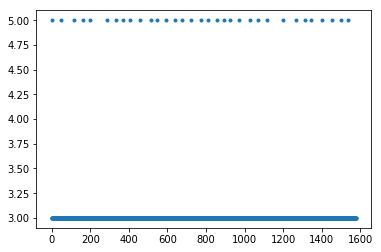

####### Others ########


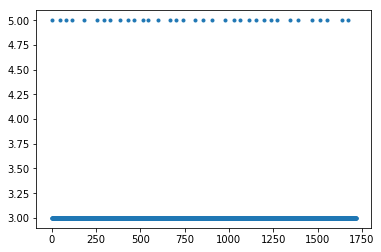

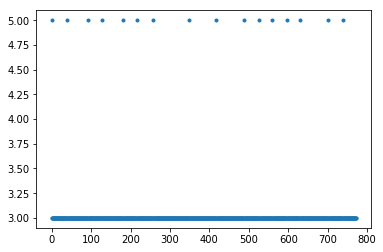

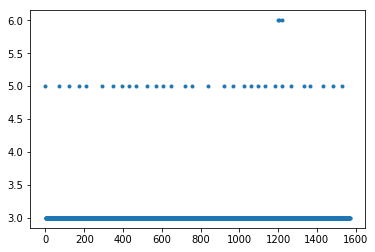

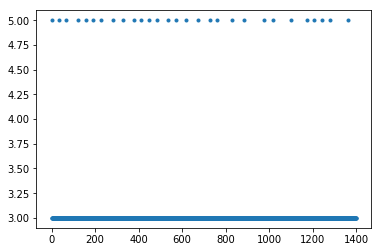

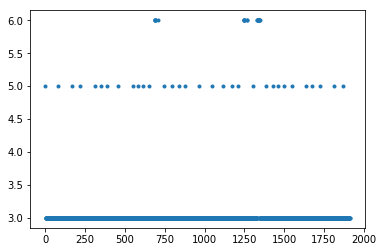

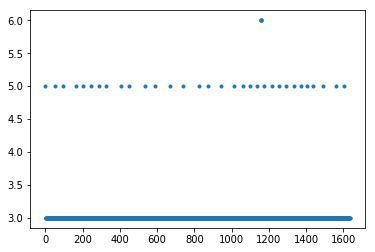

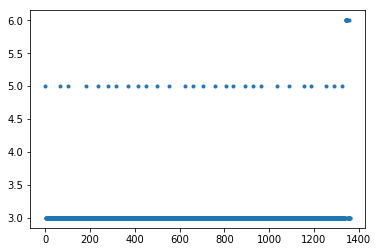

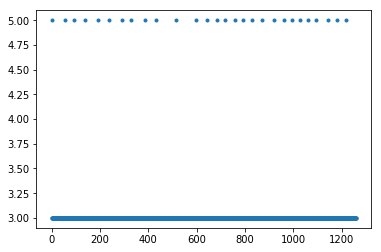

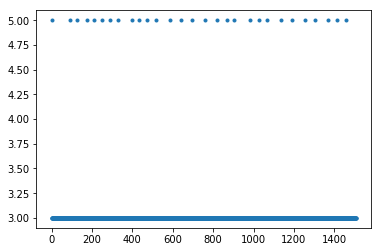

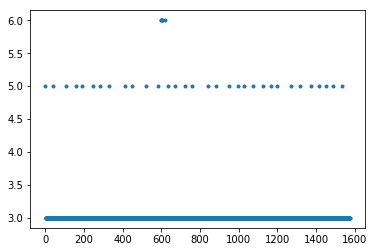

In [129]:
plot_eval("len(p['TCP'].options)")

####### Reference ########


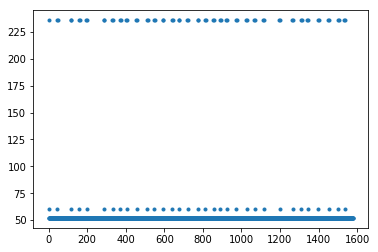

####### Others ########


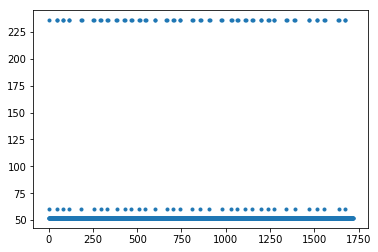

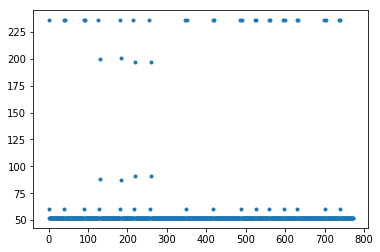

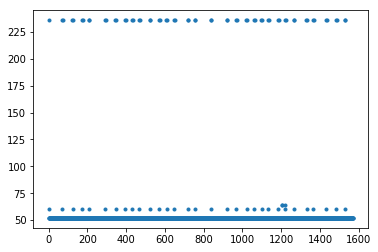

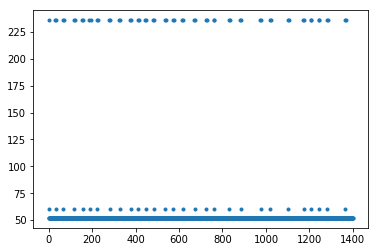

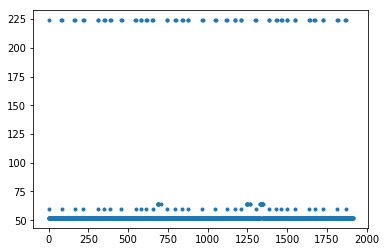

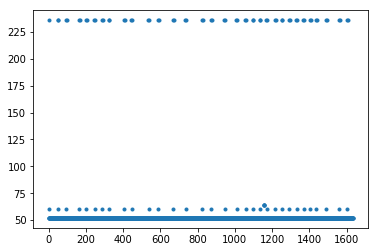

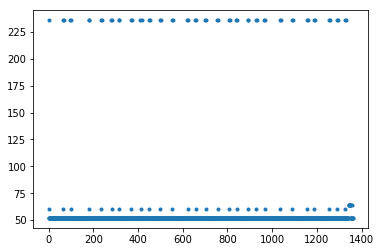

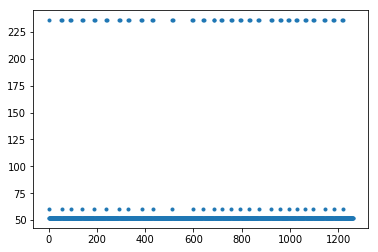

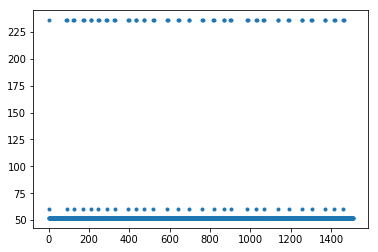

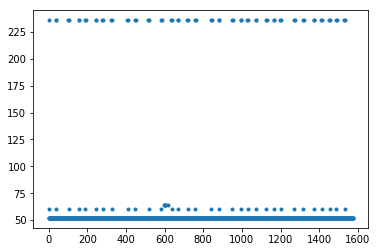

In [143]:
plot_eval("p['IP'].len")

####### Reference ########


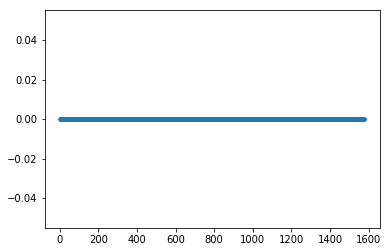

####### Others ########


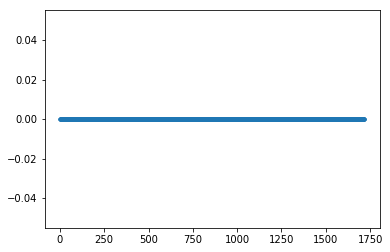

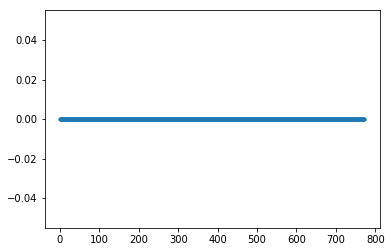

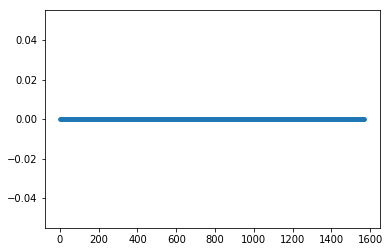

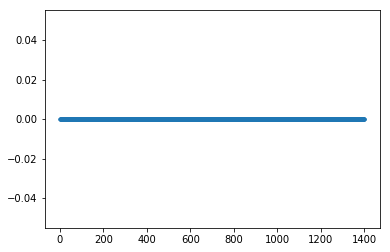

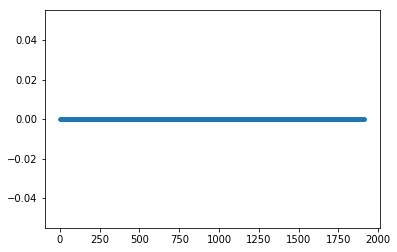

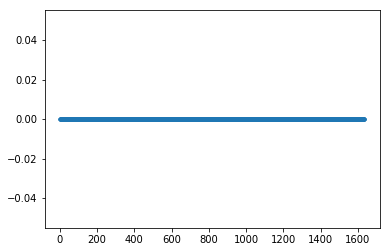

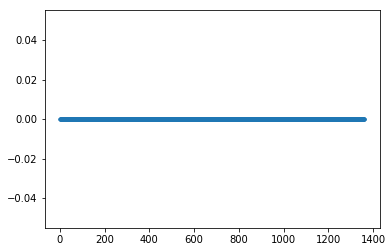

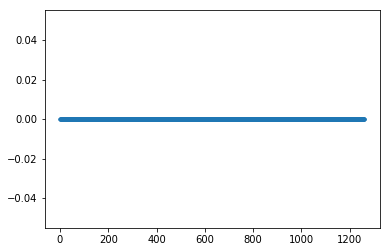

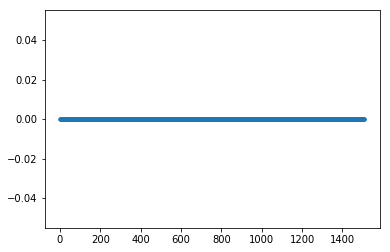

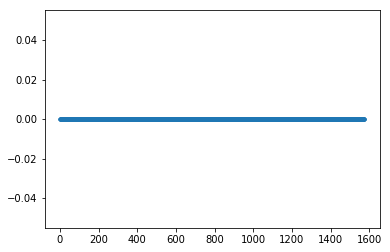

In [148]:
plot_eval("p['IP'].frag)")